In [41]:
# Step 1: # Install necessary libraries
!pip install pandas nltk wordcloud gensim pyLDAvis scikit-learn shap
!pip install pandas nltk wordcloud gensim pyLDAvis sklearn
!pip install pandas nltk wordcloud gensim pyLDAvis sklearn transformers
!pip install scikit-learn
!pip install pyLDAvis

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import Word2Vec
from gensim import corpora
from gensim.models import CoherenceModel
from sklearn.decomposition import PCA
import shap


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue wi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# Step 2: Load and explore the dataset
file_path = '1429_1.csv'  # Path to your dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Select relevant columns
data_subset = data[['id', 'name', 'brand', 'categories', 'reviews.text']]
print(data_subset.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

<ipython-input-42-c5170329b945>:3: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [43]:
# Step 3: Text Cleaning
# TEXT CLEANING
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    else:
        text = ''  # Handle non-string values
    return text

data['cleaned_text'] = data['reviews.text'].apply(clean_text)

# LOWERCASE
data['cleaned_text'] = data['cleaned_text'].str.lower()

# REMOVING STOP WORDS
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Step 4: # TOKENIZATION
data['tokens'] = data['cleaned_text'].apply(word_tokenize)

# STEMMING
stemmer = PorterStemmer()

def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

data['stemmed_text'] = data['tokens'].apply(stem_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-c822da364e15>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['name', 'reviews.text'], inplace=True)
<ipython-input-45-c822da364e15>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Missing values in each column:
 id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               6
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            7
cleaned_text                0
tokens                      0
stemmed_text                0
dtype: int64

Missing values after handling:
 id                          0
name                        0
asins                       0
brand                       0
categories                  0
keys                        0
manufacturer          

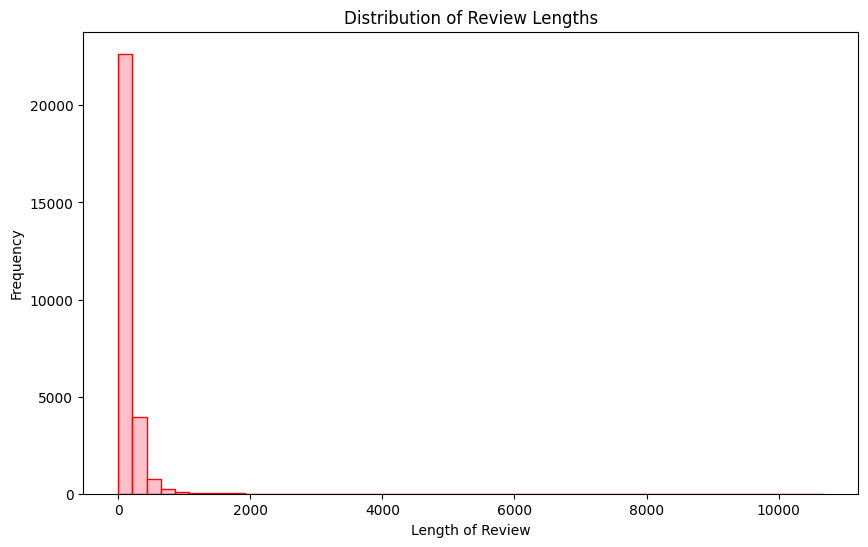

In [45]:
# Step 5: Exploratory Data Analysis (EDA)
# CLEANING THE MISSING VALUES
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

data = data.dropna(subset=['name', 'asins', 'reviews.text'])
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)

# Drop missing values in important columns
data.dropna(subset=['name', 'reviews.text'], inplace=True)

# Distribution of review lengths
data['review_length'] = data['reviews.text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(data['review_length'], bins=50, color='pink', edgecolor='red')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


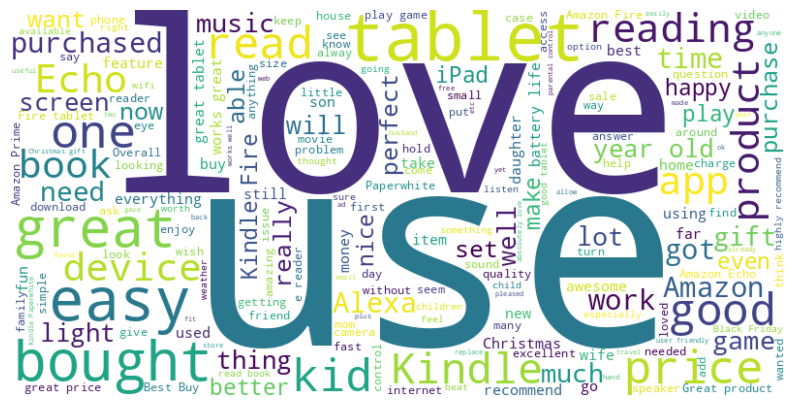

In [46]:
# Step 6: Word Cloud for Visualizing Reviews
all_reviews = ' '.join(data['reviews.text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
# Step 7: Sentiment Labelling based on Ratings
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['reviews.rating'].apply(label_sentiment)
print(data[['reviews.rating', 'sentiment']].head())

   reviews.rating sentiment
0             5.0  positive
1             5.0  positive
2             5.0  positive
3             4.0  positive
4             5.0  positive


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Step 8: Sentiment Analysis using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
data['vader_scores'] = data['reviews.text'].apply(lambda review: sid.polarity_scores(review))
data['vader_compound'] = data['vader_scores'].apply(lambda score_dict: score_dict['compound'])
print(data[['reviews.text', 'vader_scores', 'vader_compound']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                        vader_scores  vader_compound  
0  {'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...          0.9194  
1  {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'comp...          0.8934  
2  {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...          0.4404  
3  {'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'co...          0.9884  
4  {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...          0.7876  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


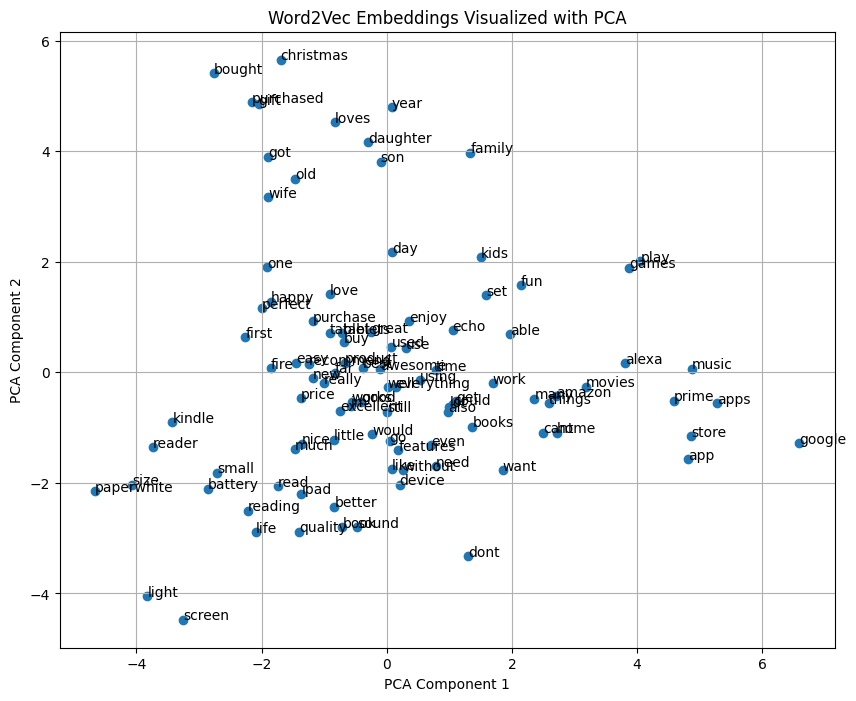

In [49]:
# WORD2VEC MODEL
word2vec_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=5, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in word2vec_model.wv]
    return np.mean(word2vec_model.wv[doc], axis=0) if doc else np.zeros(word2vec_model.vector_size)

X_word2vec = np.array([document_vector(doc) for doc in data['tokens']])

# Visualization of Word2Vec embeddings
def plot_word2vec(word2vec_model, num_words=100):
    words = list(word2vec_model.wv.index_to_key[:num_words])
    word_vectors = word2vec_model.wv[words]

    pca = PCA(n_components=2)
    word_vec_pca = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(word_vec_pca[:, 0], word_vec_pca[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (word_vec_pca[i, 0], word_vec_pca[i, 1]))
    plt.title('Word2Vec Embeddings Visualized with PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

plot_word2vec(word2vec_model)


In [50]:
# Step 9: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text'])
print(f"TF-IDF matrix shape: {X_tfidf.shape}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TF-IDF matrix shape: (27897, 1000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


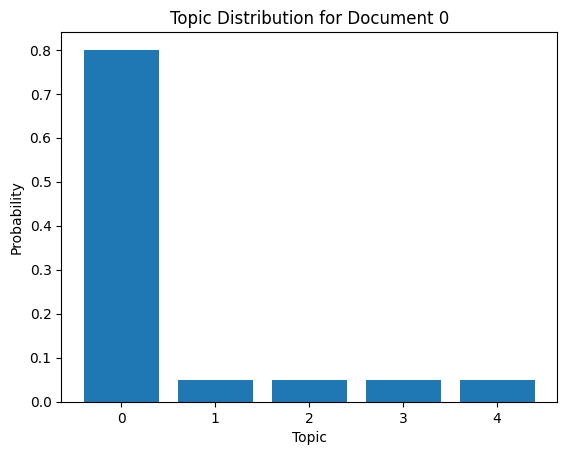

In [51]:
# Combine TF-IDF and LDA Topic Vectors for Classification
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# LDA for Topic Modeling
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X_tfidf)  # Fit the LDA model on the TF-IDF matrix

lda_topic_distributions = lda_model.transform(X_tfidf)  # This gives topic distribution for each document

# Add the topic distributions to the data as new features
data['lda_vector'] = list(lda_topic_distributions)

import matplotlib.pyplot as plt
import numpy as np

# Choose a document index to visualize its topic distribution
doc_idx = 0  # Example: First document
topic_distribution = lda_topic_distributions[doc_idx]

plt.bar(np.arange(n_topics), topic_distribution)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title(f'Topic Distribution for Document {doc_idx}')
plt.show()



In [52]:
# Step 10: LDA Topic Modeling
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X_tfidf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda_model, tfidf_feature_names, no_top_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
tablet, great, price, good, apps, amazon, kids, games, use, movies
Topic 1:
echo, alexa, music, home, love, great, fun, use, amazon, sound
Topic 2:
kindle, read, screen, reading, love, best, like, paperwhite, books, new
Topic 3:
loves, bought, gift, old, year, christmas, tablet, daughter, son, great
Topic 4:
easy, great, use, product, love, recommend, tablet, read, good, light


In [53]:
# Step 11: LDA Visualization using Gensim & pyLDAvis
dictionary = corpora.Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(text) for text in data['tokens']]
lda_model_gensim = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topics, random_state=42, passes=10)

lda_vis = gensimvis.prepare(lda_model_gensim, corpus, dictionary)
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Step 12: Word2Vec Model
word2vec_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=5, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in word2vec_model.wv]
    return np.mean(word2vec_model.wv[doc], axis=0) if doc else np.zeros(word2vec_model.vector_size)

X_word2vec = np.array([document_vector(doc) for doc in data['tokens']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Step 13: Combine TF-IDF and LDA Topic Vectors for Classification
def get_topic_distribution(lda_model, corpus):
    return [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

data['lda_topic_distribution'] = get_topic_distribution(lda_model_gensim, corpus)
data['lda_vector'] = data['lda_topic_distribution'].apply(lambda x: np.array([prob for _, prob in x]))

combined_features = np.hstack([X_tfidf.toarray(), np.vstack(data['lda_vector'])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Step 14: Train-Test Split and Classification
X_train, X_test, y_train, y_test = train_test_split(combined_features, data['sentiment'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# Step 15: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9274193548387096


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
